In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_excel("dataset.xlsx")

# Aperçu général
print(df.info())
print(df.head())
#dimension
print(df.shape)
#nombre d'individus
n = df.shape[0]
#nombre de variables
p = df.shape[1]
print(n)
print(p)
print(df.describe(include='all'))  # pour toutes les colonnes, y compris qualitatives


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   individu              200 non-null    object 
 1   soil_moisture_%       200 non-null    float64
 2   soil_pH               200 non-null    float64
 3   temperature_C         200 non-null    float64
 4   rainfall_mm           200 non-null    float64
 5   humidity_%            200 non-null    float64
 6   sunlight_hours        200 non-null    float64
 7   pesticide_usage_ml    200 non-null    float64
 8   yield_kg_per_hectare  200 non-null    float64
 9   region                200 non-null    object 
 10  crop_type             200 non-null    object 
 11  irrigation_type       135 non-null    object 
dtypes: float64(8), object(4)
memory usage: 18.9+ KB
None
  individu  soil_moisture_%  soil_pH  temperature_C  rainfall_mm  humidity_%  \
0    ind_1            29.10     6.45       

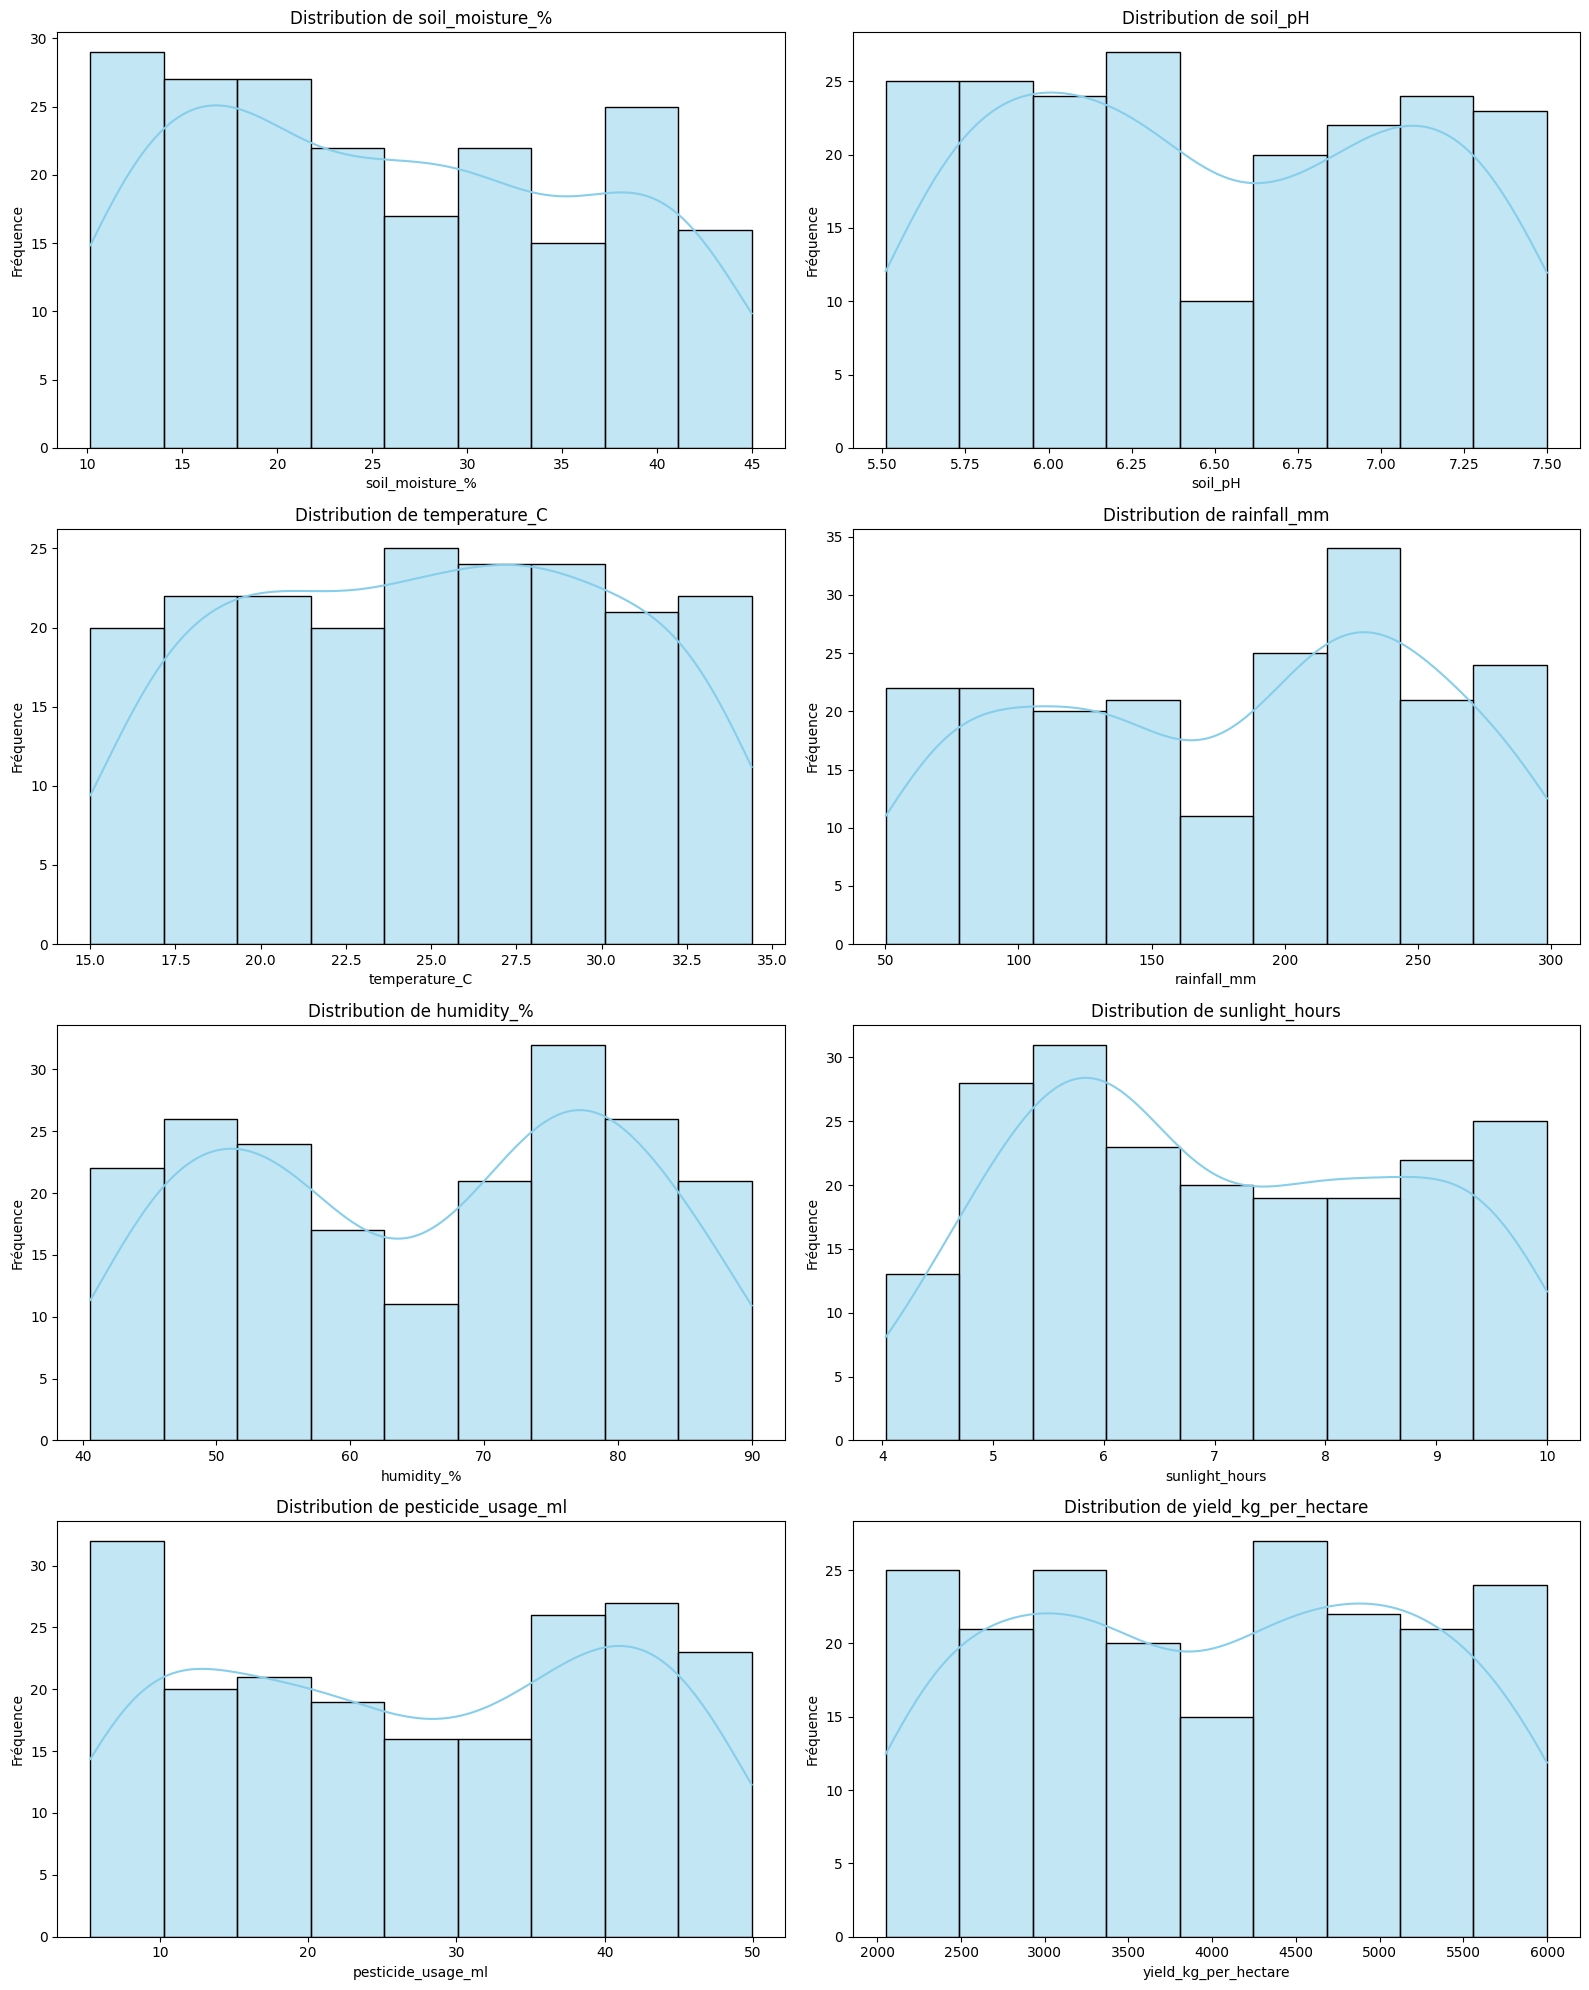

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 20))
for i, col in enumerate(quant_vars):
    plt.subplot(4, 2, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

# les variables ne suivent pas une loi noramle

       soil_moisture_%     soil_pH  temperature_C  rainfall_mm  humidity_%  \
count       200.000000  200.000000     200.000000   200.000000  200.000000   
mean         26.052900    6.487950      24.932200   180.462800   65.614200   
std          10.406436    0.597231       5.473959    73.827346   14.650184   
min          10.160000    5.510000      15.010000    50.170000   40.590000   
25%          17.132500    5.957500      20.257500   116.910000   51.692500   
50%          25.260000    6.365000      24.880000   192.805000   68.235000   
75%          35.230000    7.042500      29.555000   237.695000   78.297500   
max          44.980000    7.500000      34.400000   298.520000   90.000000   

       sunlight_hours  pesticide_usage_ml  yield_kg_per_hectare  
count       200.00000           200.00000            200.000000  
mean          7.02355            27.33705           4019.355500  
std           1.68484            13.88537           1185.907133  
min           4.03000            

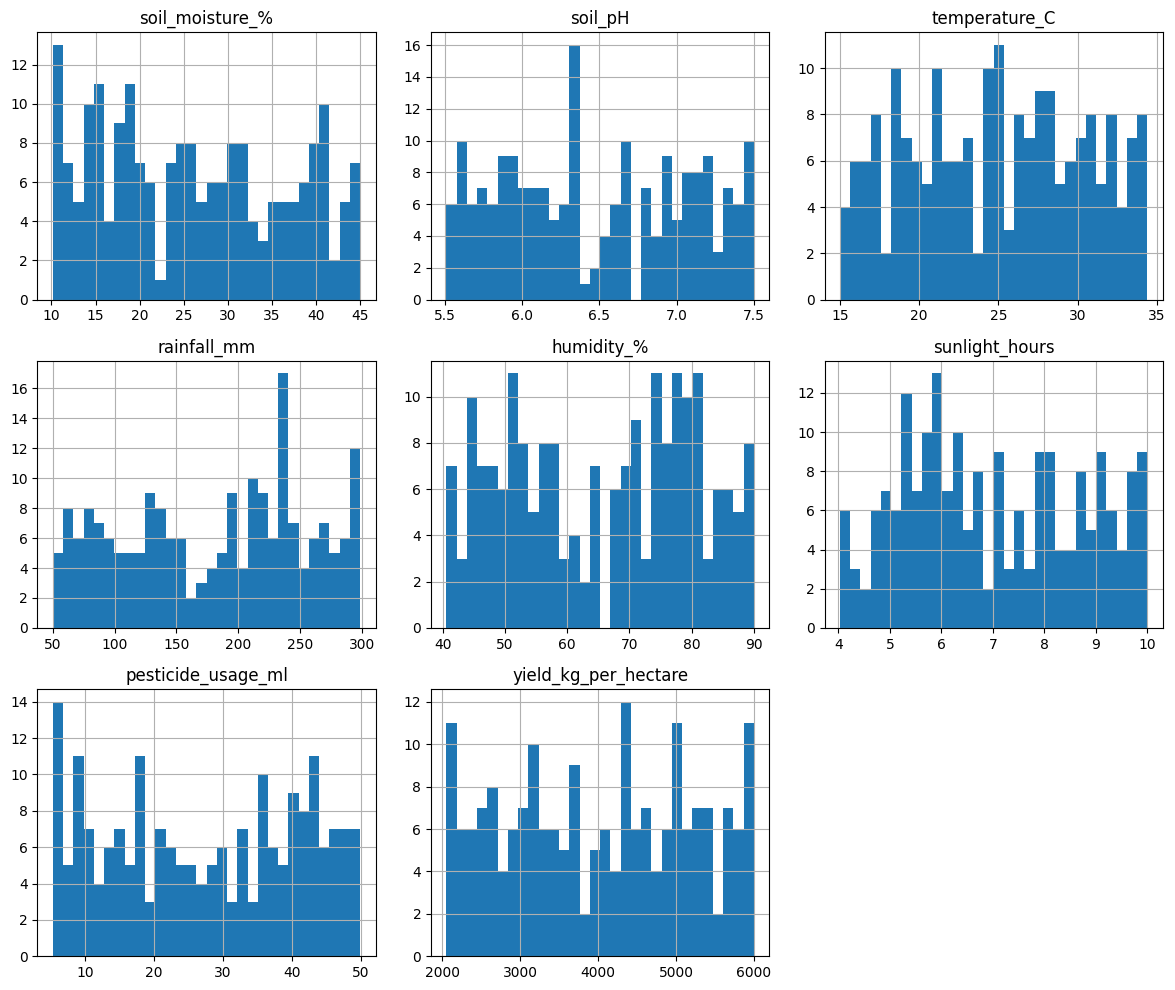

In [ ]:
quant_vars = df.select_dtypes(include=['float64', 'int64'])

# Statistiques descriptives
print(quant_vars.describe())

# Histogrammes
quant_vars.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()


In [ ]:
qual_vars = df.select_dtypes(include=['object', 'category'])

# Valeurs uniques
for col in qual_vars.columns:
    print(f"{col} :\n{df[col].value_counts(normalize=True)*100}\n")


individu :
individu
ind_1      0.5
ind_2      0.5
ind_3      0.5
ind_4      0.5
ind_5      0.5
          ... 
ind_196    0.5
ind_197    0.5
ind_198    0.5
ind_199    0.5
ind_200    0.5
Name: proportion, Length: 200, dtype: float64

region :
region
East Africa    25.0
Central USA    24.5
South USA      18.0
North India    17.5
South India    15.0
Name: proportion, dtype: float64

crop_type :
crop_type
Maize      26.5
Cotton     20.5
Soybean    20.5
Rice       20.0
Wheat      12.5
Name: proportion, dtype: float64

irrigation_type :
irrigation_type
Sprinkler    38.518519
Manual       31.851852
Drip         29.629630
Name: proportion, dtype: float64



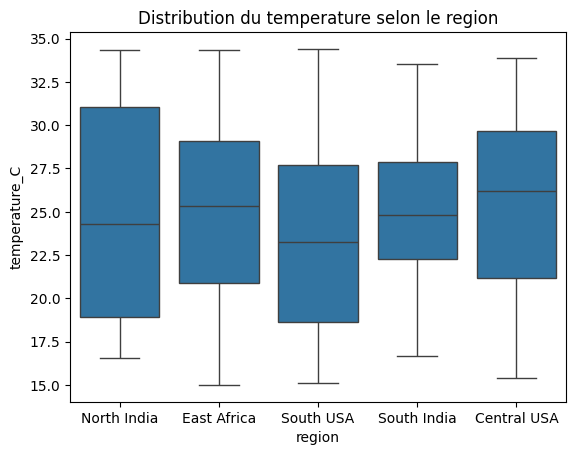

In [ ]:
sns.boxplot(x='region', y='temperature_C', data=df)
plt.title("Distribution du temperature selon le region")
plt.show()
#des regions plus chaudes que d autres

<ipython-input-23-e704e117a888>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=group_by, y=col, palette='Set2')
<ipython-input-23-e704e117a888>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=group_by, y=col, palette='Set2')
<ipython-input-23-e704e117a888>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=group_by, y=col, palette='Set2')
<ipython-input-23-e704e117a888>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `

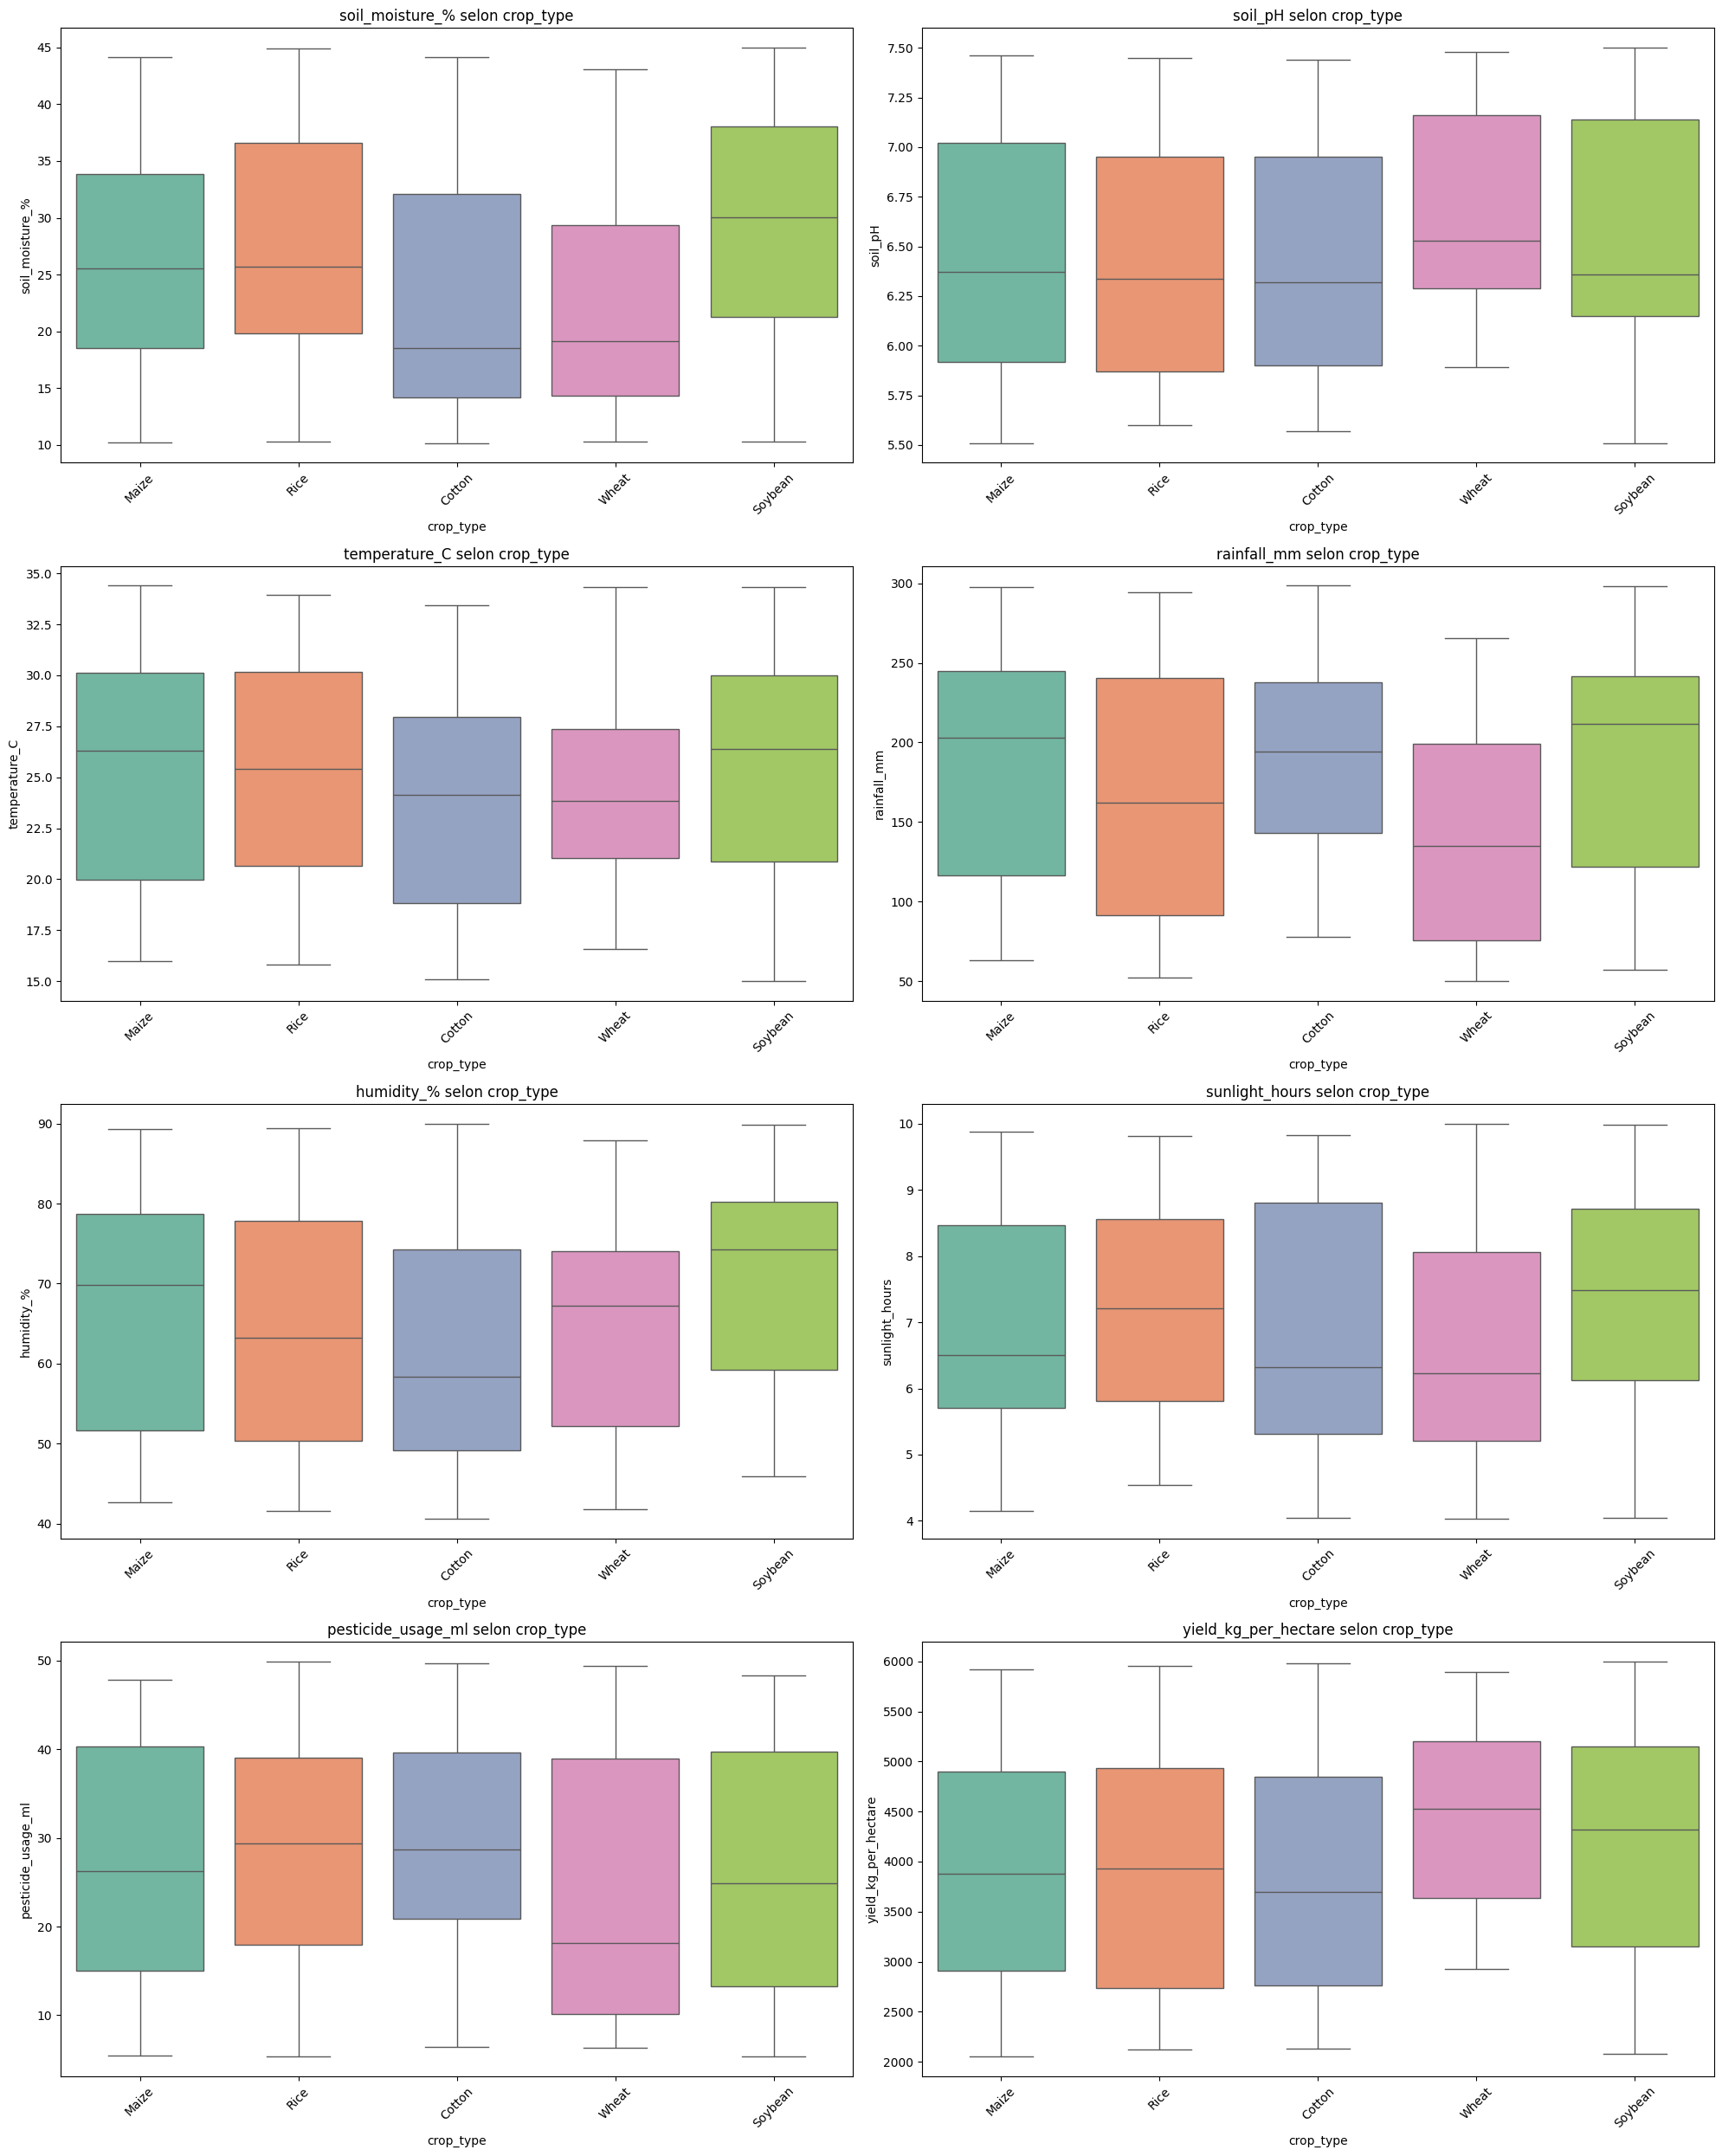

In [ ]:

quant_vars = [
    'soil_moisture_%', 'soil_pH', 'temperature_C', 'rainfall_mm',
    'humidity_%', 'sunlight_hours', 'pesticide_usage_ml', 'yield_kg_per_hectare'
]

# Variable qualitative pour comparaison
group_by = 'crop_type'

# Création des boxplots
plt.figure(figsize=(20, 25))
for i, col in enumerate(quant_vars):
    plt.subplot(4, 2, i+1)
    sns.boxplot(data=df, x=group_by, y=col, palette='Set2')
    plt.title(f'{col} selon {group_by}')
    plt.xticks(rotation=45)
    plt.xlabel(group_by)
    plt.ylabel(col)

plt.tight_layout()
plt.show()
# 🌾 soil_pH selon crop_type : certaines cultures préfèrent un pH plus acide ou plus alcalin.

# 🌞 sunlight_hours selon crop_type : certaines plantes nécessitent plus d'exposition solaire.

# 💧 soil_moisture_% selon crop_type : pour voir quelles cultures demandent plus d'eau.

# 🧪 pesticide_usage_ml selon crop_type : peut révéler quelles cultures sont plus sensibles aux nuisibles.

# 📈 yield_kg_per_hectare selon crop_type : pour identifier les cultures les plus productives.




<ipython-input-24-5b21b50eef2f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=group_by, y=col, palette='Set2')
<ipython-input-24-5b21b50eef2f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=group_by, y=col, palette='Set2')
<ipython-input-24-5b21b50eef2f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=group_by, y=col, palette='Set2')
<ipython-input-24-5b21b50eef2f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `

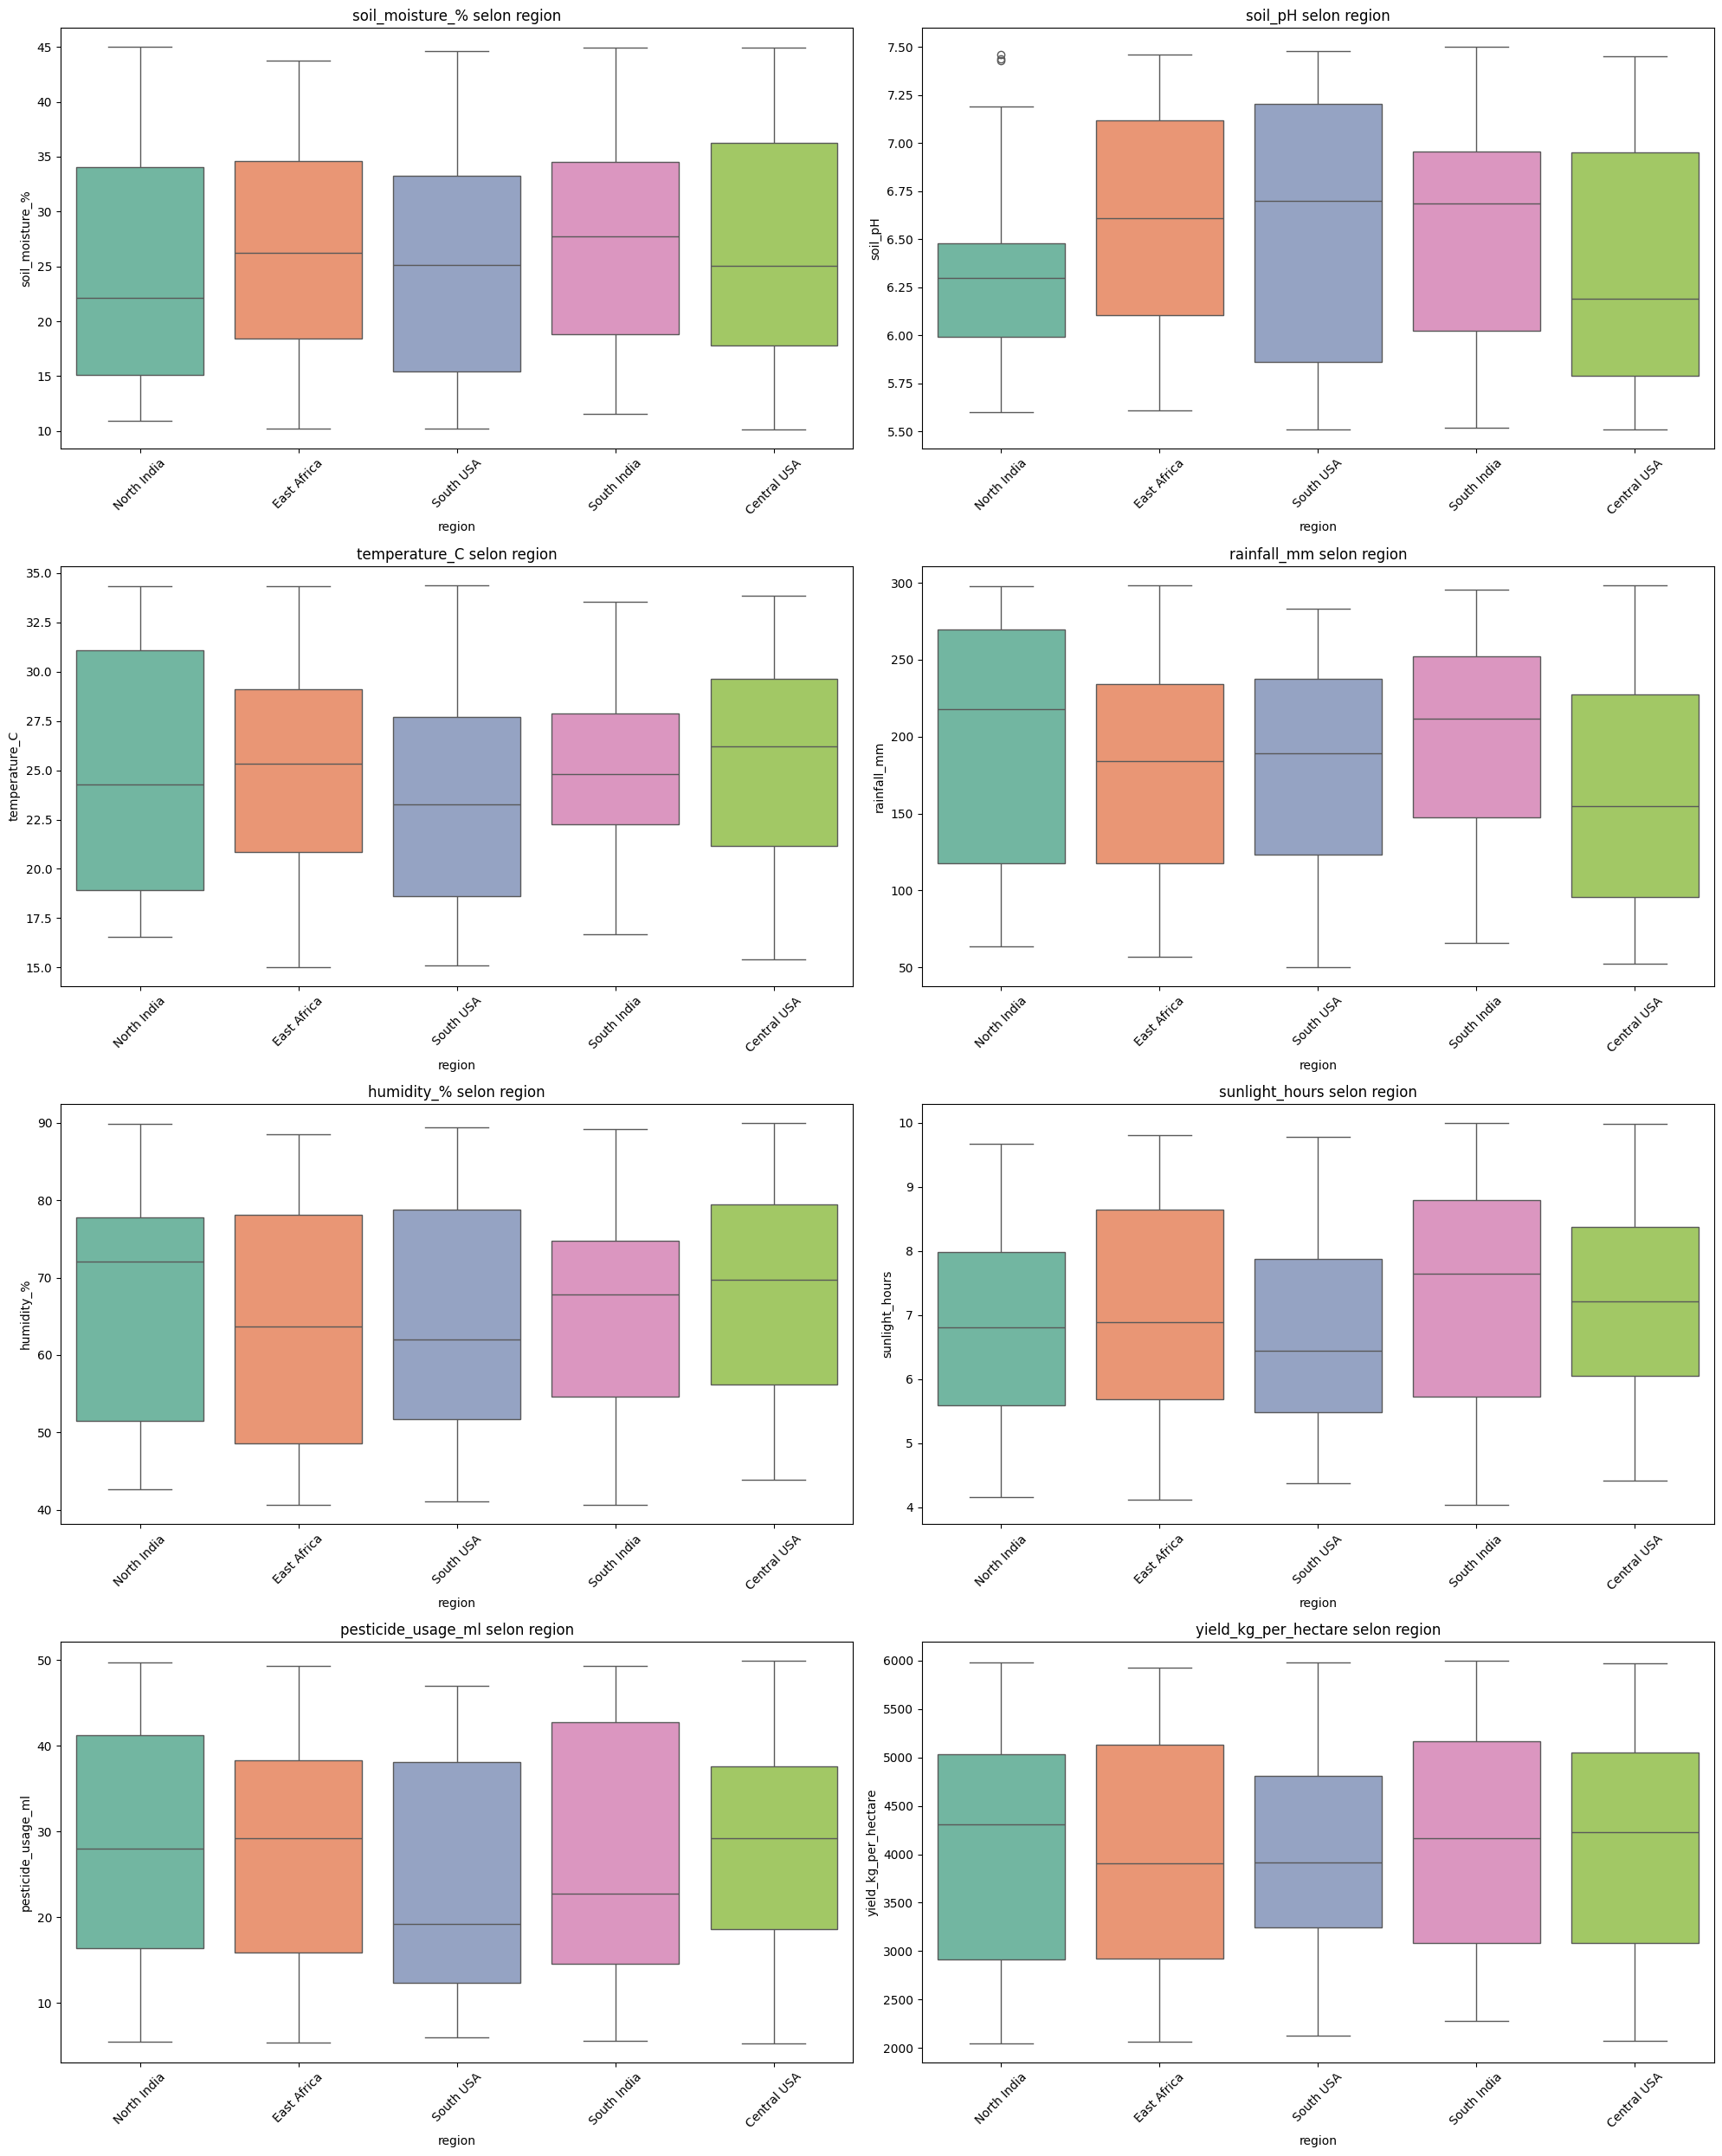

In [ ]:
quant_vars = [
    'soil_moisture_%', 'soil_pH', 'temperature_C', 'rainfall_mm',
    'humidity_%', 'sunlight_hours', 'pesticide_usage_ml', 'yield_kg_per_hectare'
]

# Variable qualitative pour comparaison
group_by = 'region'

# Création des boxplots
plt.figure(figsize=(20, 25))
for i, col in enumerate(quant_vars):
    plt.subplot(4, 2, i+1)
    sns.boxplot(data=df, x=group_by, y=col, palette='Set2')
    plt.title(f'{col} selon {group_by}')
    plt.xticks(rotation=45)
    plt.xlabel(group_by)
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
# → Étape 2 : Imputation de 'irrigation_type' par groupe de 'region'
df['irrigation_type'] = df.groupby('region')['irrigation_type'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown")
)
# → Étape 3 : Affichage des nouvelles valeurs pour 'irrigation_type'
print("Nouvelles valeurs de 'irrigation_type' après imputation :")
print(df['irrigation_type'].value_counts())
# → Étape 4 : Vérification post-imputation
print(df['irrigation_type'].isnull().sum())  # Doit afficher 0

Nouvelles valeurs de 'irrigation_type' après imputation :
irrigation_type
Sprinkler    76
Manual       72
Drip         52
Name: count, dtype: int64
0


In [ ]:
# Calcul de la matrice de corrélation
corr_matrix = df[quant_vars].corr()
print(corr_matrix)


                      soil_moisture_%   soil_pH  temperature_C  rainfall_mm  \
soil_moisture_%              1.000000  0.013764       0.181960    -0.041608   
soil_pH                      0.013764  1.000000      -0.035728    -0.017378   
temperature_C                0.181960 -0.035728       1.000000     0.090664   
rainfall_mm                 -0.041608 -0.017378       0.090664     1.000000   
humidity_%                   0.020244 -0.054089      -0.036540    -0.022164   
sunlight_hours               0.111227 -0.045845       0.022610     0.065018   
pesticide_usage_ml           0.086427 -0.189028       0.011079     0.050362   
yield_kg_per_hectare        -0.083350 -0.057541       0.048560    -0.021382   

                      humidity_%  sunlight_hours  pesticide_usage_ml  \
soil_moisture_%         0.020244        0.111227            0.086427   
soil_pH                -0.054089       -0.045845           -0.189028   
temperature_C          -0.036540        0.022610            0.011079   


In [ ]:
from sklearn.decomposition import PCA

# Standardisation des données (avant l'ACP, très important)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[quant_vars])

# Calcul de l'ACP
pca = PCA()
pca.fit(scaled_data)

# Affichage des valeurs propres et des vecteurs propres
print(f"Valeurs propres : {pca.explained_variance_}")
print(f"Vecteurs propres : {pca.components_}")


Valeurs propres : [1.34914893 1.17213296 1.08200789 1.03674717 0.99710246 0.93291525
 0.77259213 0.6975542 ]
Vecteurs propres : [[ 4.18869472e-01 -4.03277587e-01  3.69108860e-01  2.19721973e-01
   7.13972835e-02  4.36825989e-01  5.27572912e-01  5.61138397e-02]
 [ 4.80403491e-01  4.92872400e-01  4.46514192e-01  8.33266659e-02
  -3.72625681e-01  4.15562206e-02 -3.04426036e-01 -2.94480895e-01]
 [-4.00690139e-01 -5.28368332e-04  1.93500703e-01  4.73381244e-01
  -4.09912971e-01  2.41835159e-01 -2.18193599e-01  5.51174631e-01]
 [ 2.30252984e-01  2.88192799e-03  3.39549225e-01 -5.13038804e-01
   3.04247564e-01 -5.53570490e-02 -2.67228343e-01  6.33585667e-01]
 [ 9.58583923e-02  1.40048144e-01 -4.43987254e-01 -4.74137377e-01
  -4.01275891e-01  6.10562317e-01  7.74634640e-02  9.72495795e-02]
 [ 6.91767701e-02  4.96093907e-01 -2.21046376e-01  3.56668799e-01
   6.27831833e-01  4.05034512e-01 -9.76523875e-02  7.25914755e-02]
 [-2.13089333e-02  5.46505251e-01  1.91452077e-02 -9.15516135e-03
  -1.290

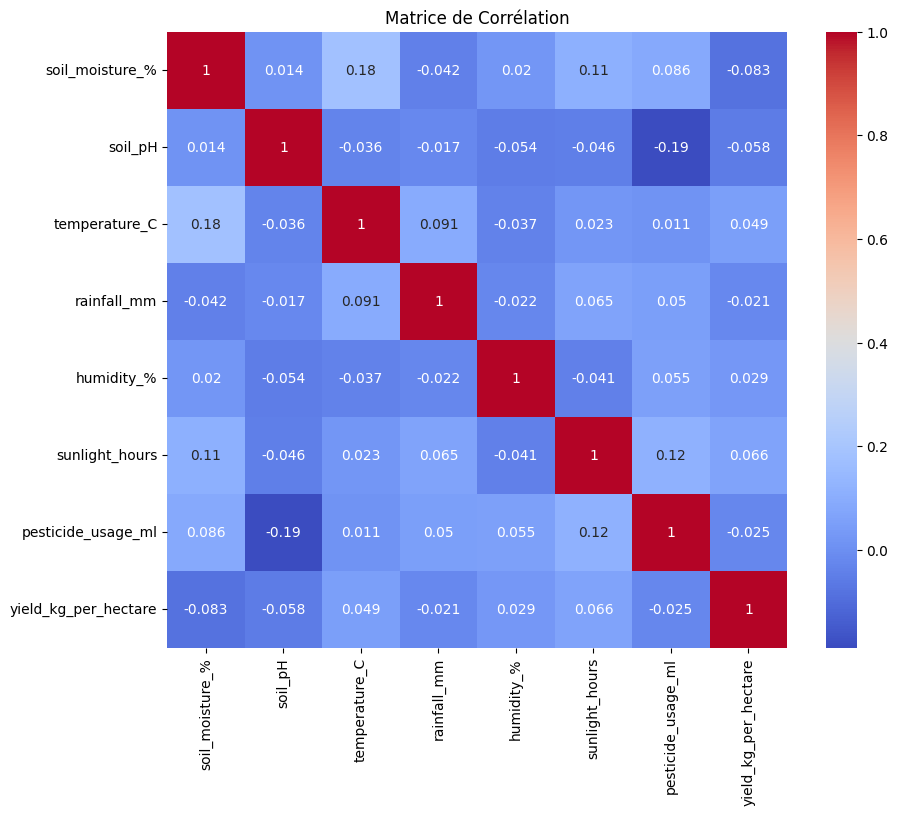

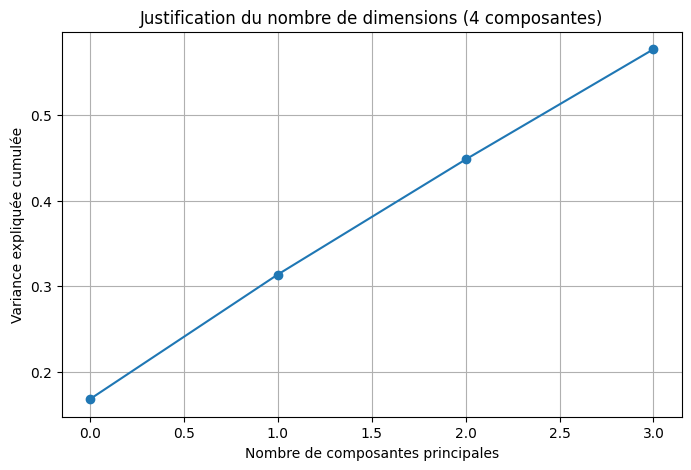

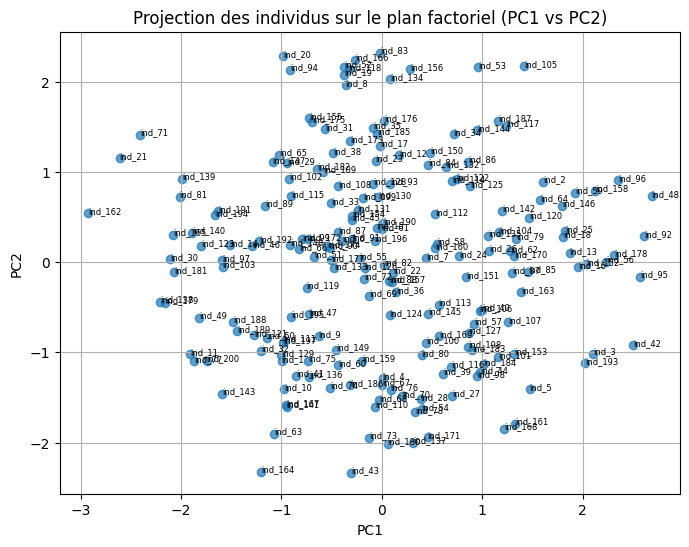

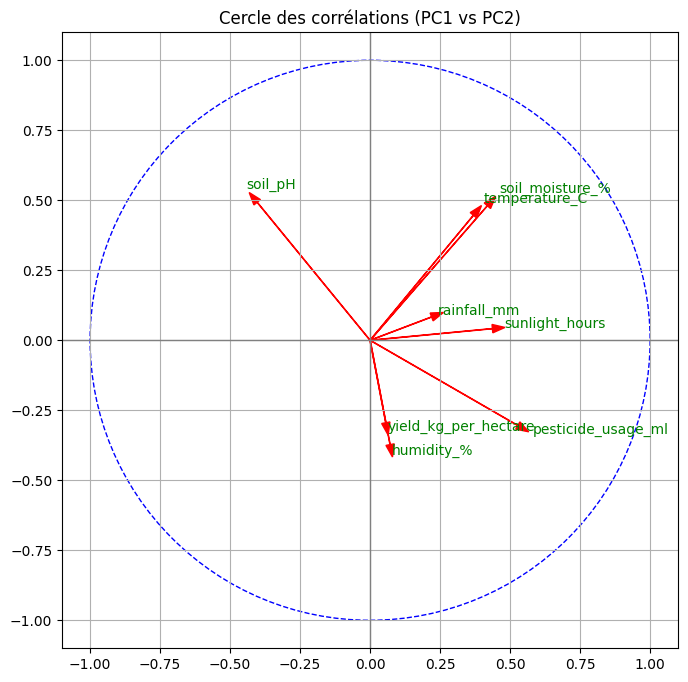

Contribution des variables aux 4 premières composantes :
                           PC1       PC2           PC3       PC4
soil_moisture_%       0.175452  0.230788  1.605526e-01  0.053016
soil_pH               0.162633  0.242923  2.791731e-07  0.000008
temperature_C         0.136241  0.199375  3.744252e-02  0.115294
rainfall_mm           0.048278  0.006943  2.240898e-01  0.263209
humidity_%            0.005098  0.138850  1.680286e-01  0.092567
sunlight_hours        0.190817  0.001727  5.848424e-02  0.003064
pesticide_usage_ml    0.278333  0.092675  4.760845e-02  0.071411
yield_kg_per_hectare  0.003149  0.086719  3.037935e-01  0.401431

Cos² des variables sur les 4 premières composantes :
                           PC1       PC2           PC3       PC4
soil_moisture_%       0.175452  0.230788  1.605526e-01  0.053016
soil_pH               0.162633  0.242923  2.791731e-07  0.000008
temperature_C         0.136241  0.199375  3.744252e-02  0.115294
rainfall_mm           0.048278  0.006943  2.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Suppose your DataFrame is named df and has a column 'individu' for labeling
# Replace this with your actual DataFrame loading if needed

# Sélection des variables quantitatives
quant_vars = [
    'soil_moisture_%', 'soil_pH', 'temperature_C', 'rainfall_mm',
    'humidity_%', 'sunlight_hours', 'pesticide_usage_ml', 'yield_kg_per_hectare'
]
X = df[quant_vars]

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Matrice de corrélation
corr_matrix = pd.DataFrame(X_scaled, columns=quant_vars).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de Corrélation")
plt.show()

# ACP avec 4 composantes
pca_4d = PCA(n_components=4)
X_proj_4d = pca_4d.fit_transform(X_scaled)
components_4d = pca_4d.components_

# Variance expliquée cumulée
explained_variance = pca_4d.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée")
plt.grid()
plt.title("Justification du nombre de dimensions (4 composantes)")
plt.show()

# Projection des individus (PC1 vs PC2)
plt.figure(figsize=(8, 6))
plt.scatter(X_proj_4d[:, 0], X_proj_4d[:, 1], alpha=0.7)
for i, txt in enumerate(df['individu']):
    plt.text(X_proj_4d[i, 0], X_proj_4d[i, 1], txt, fontsize=6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection des individus sur le plan factoriel (PC1 vs PC2)")
plt.grid()
plt.show()

# Cercle des corrélations pour PC1 et PC2
plt.figure(figsize=(8, 8))
for i, var in enumerate(quant_vars):
    plt.arrow(0, 0, components_4d[0, i], components_4d[1, i],
              head_width=0.03, color='red')
    plt.text(components_4d[0, i]*1.1, components_4d[1, i]*1.1, var, color='green')
circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--')
plt.gca().add_patch(circle)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.title("Cercle des corrélations (PC1 vs PC2)")
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Cos² et Contributions – Variables
cos2_vars_4d = components_4d**2
contrib_vars_4d = cos2_vars_4d / np.sum(cos2_vars_4d, axis=1)[:, np.newaxis]

contrib_df_4d = pd.DataFrame(contrib_vars_4d.T, index=quant_vars, columns=['PC1', 'PC2', 'PC3', 'PC4'])
print("Contribution des variables aux 4 premières composantes :")
print(contrib_df_4d)

cos2_df_4d = pd.DataFrame(cos2_vars_4d.T, index=quant_vars, columns=['PC1', 'PC2', 'PC3', 'PC4'])
print("\nCos² des variables sur les 4 premières composantes :")
print(cos2_df_4d)

# Cos² et Contributions – Individus
cos2_ind_4d = X_proj_4d**2 / np.sum(X_proj_4d**2, axis=1)[:, np.newaxis]
contrib_ind_4d = X_proj_4d**2 / np.sum(X_proj_4d**2, axis=0)

cos2_ind_df_4d = pd.DataFrame(cos2_ind_4d, columns=["PC1", "PC2", "PC3", "PC4"])
cos2_ind_df_4d['individu'] = df['individu']
print("\nQualité de représentation (cos²) des individus sur les 4 axes :")
print(cos2_ind_df_4d.head())

contrib_ind_df_4d = pd.DataFrame(contrib_ind_4d, columns=["PC1", "PC2", "PC3", "PC4"])
contrib_ind_df_4d['individu'] = df['individu']
print("\nContribution des individus aux 4 premières composantes :")
print(contrib_ind_df_4d.head())


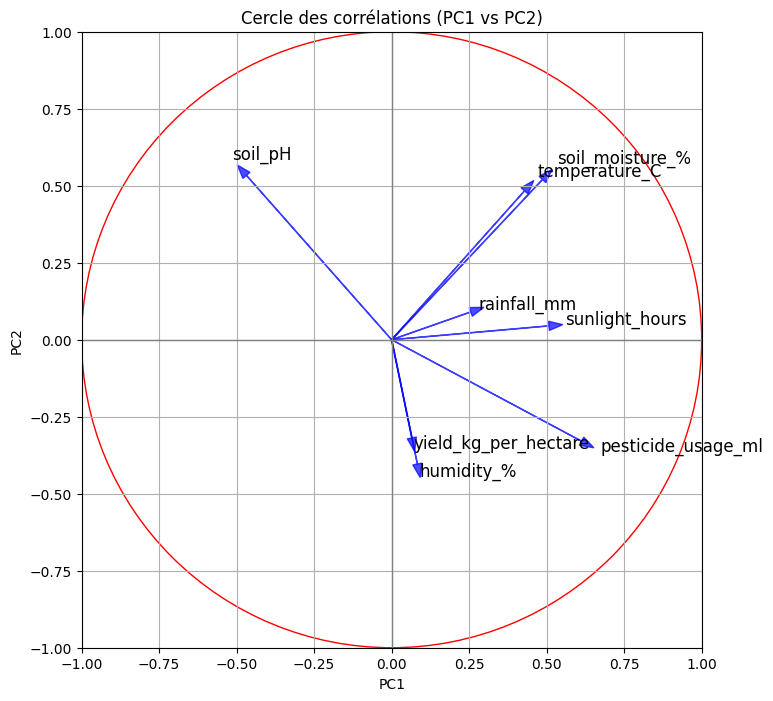

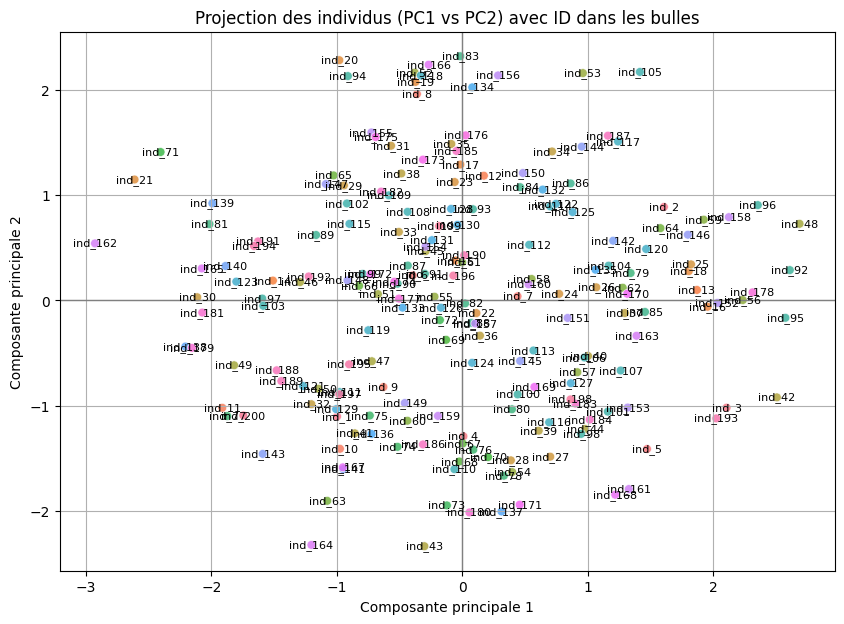

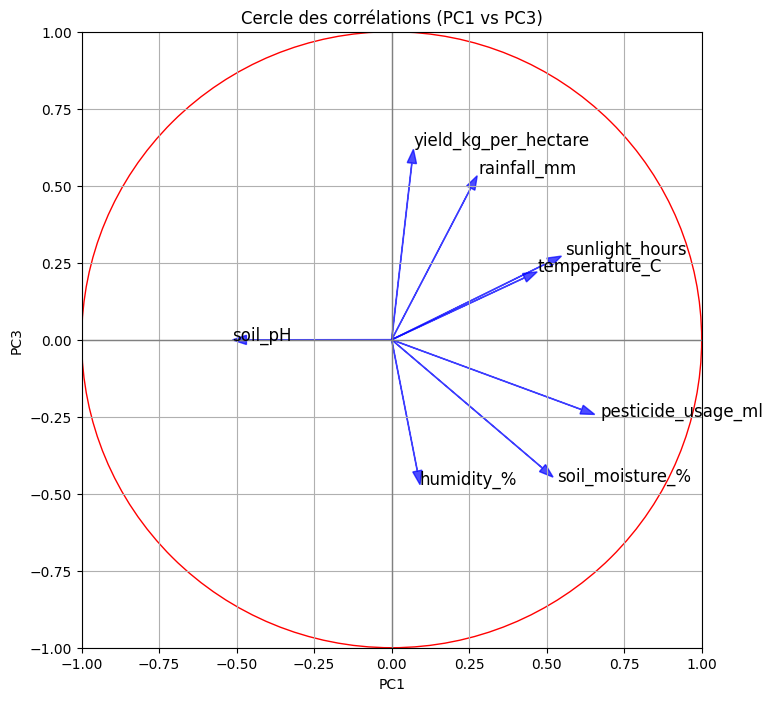

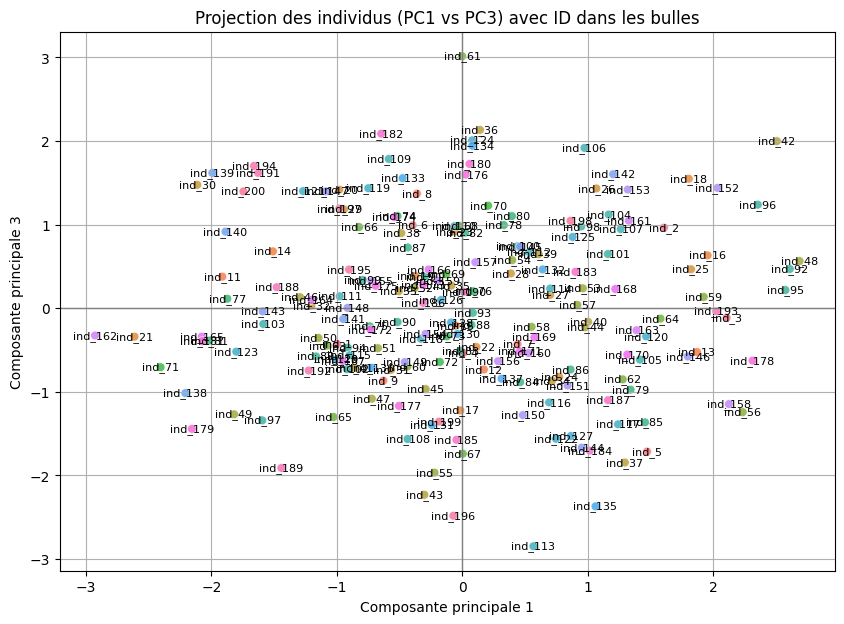

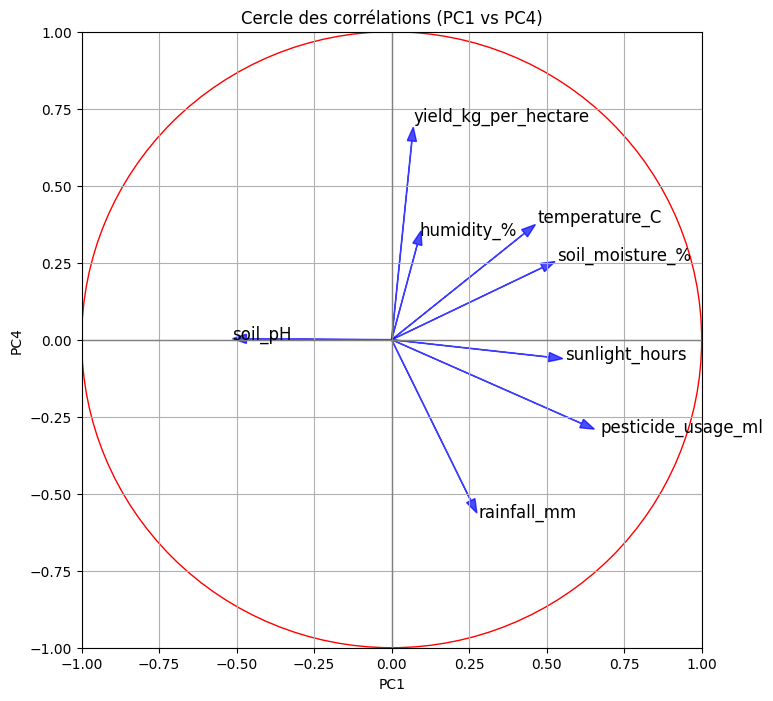

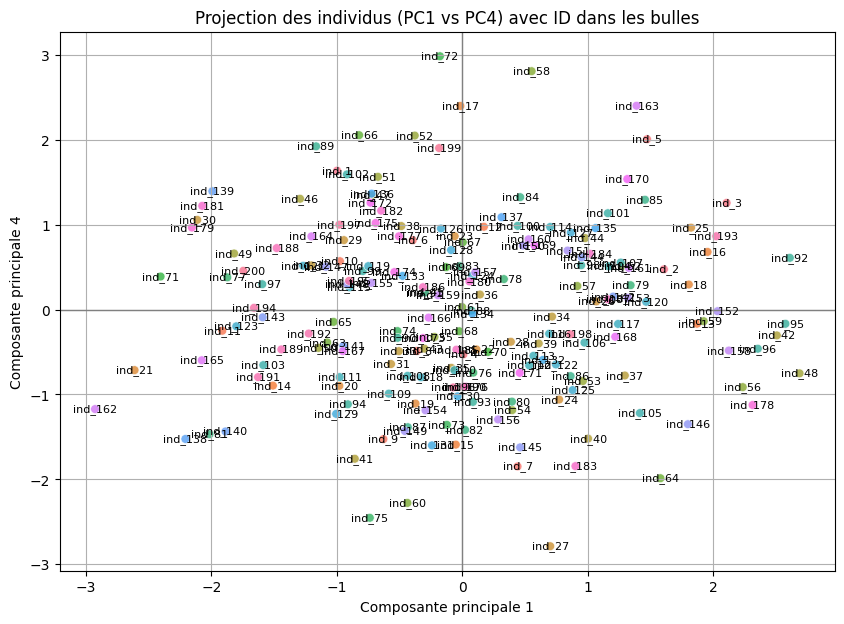

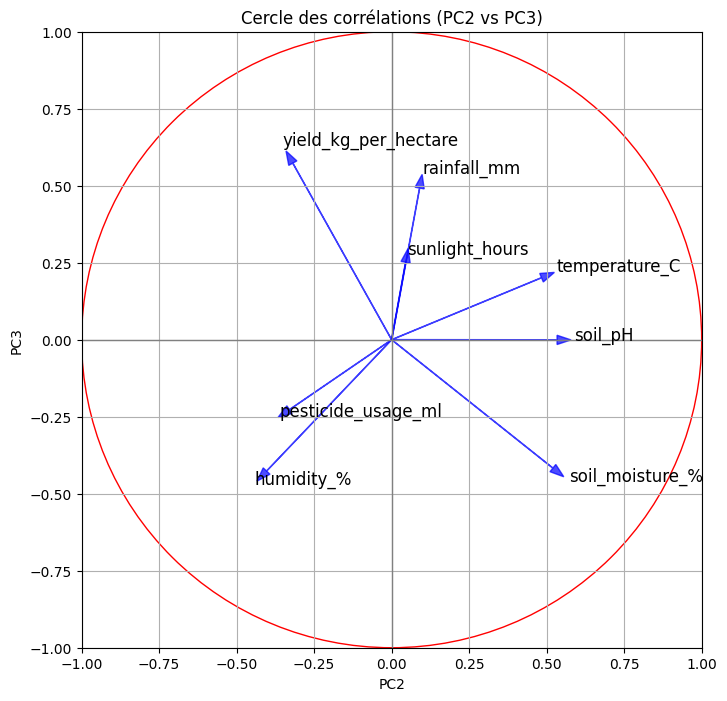

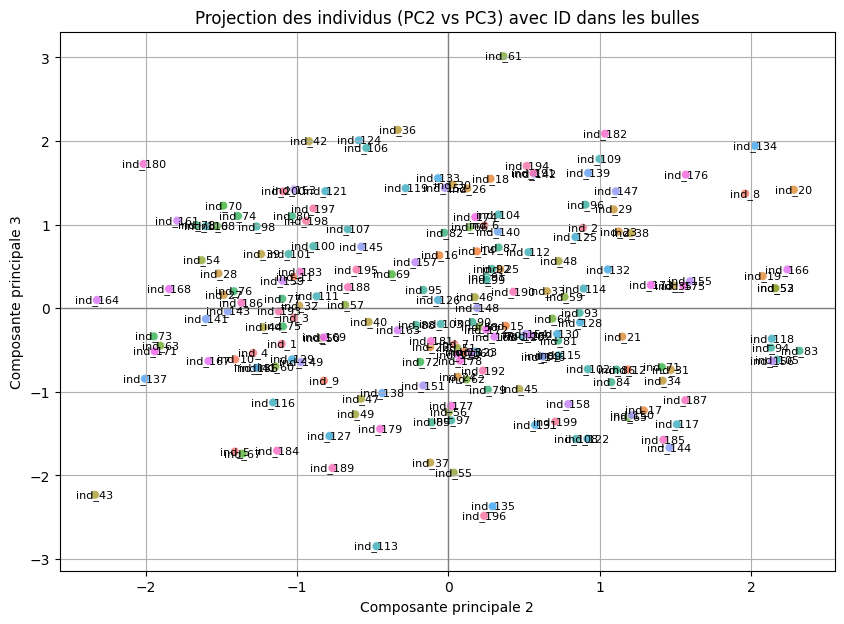

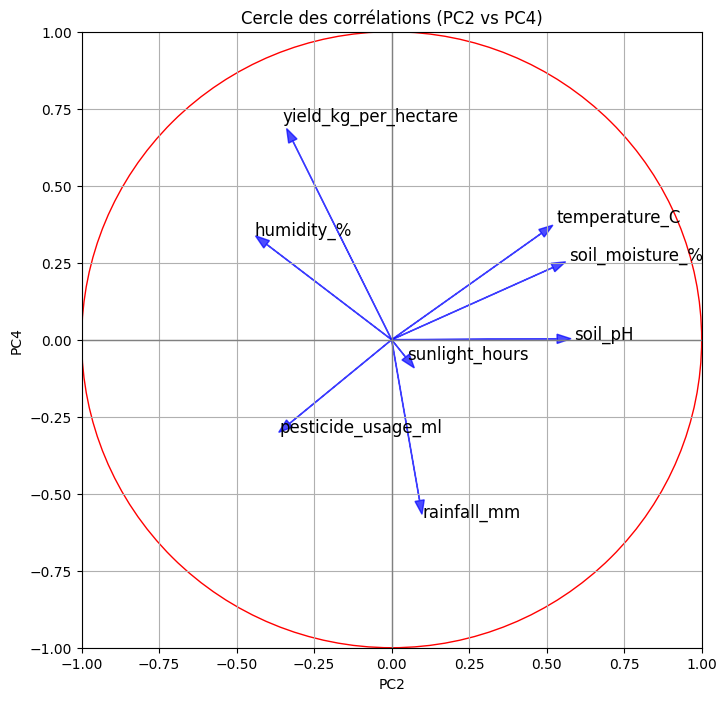

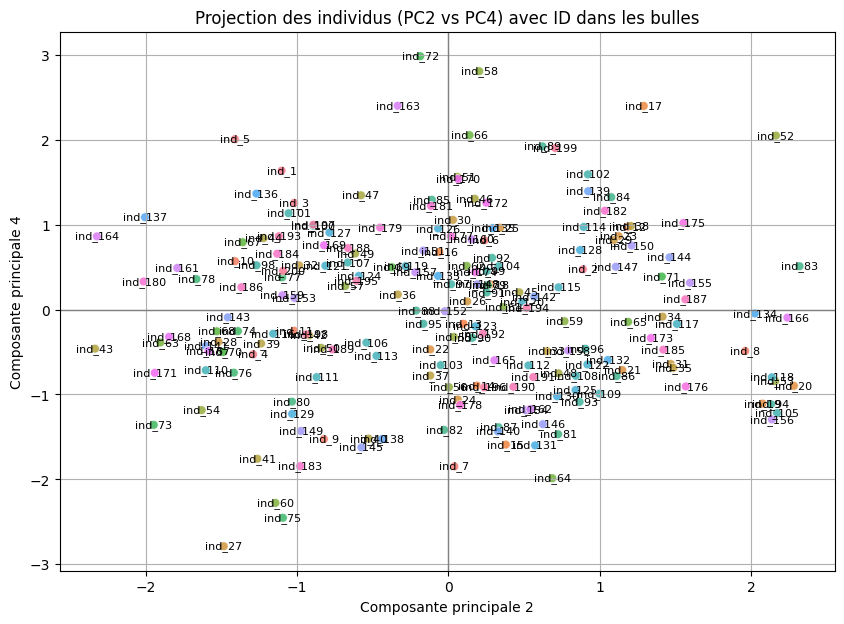

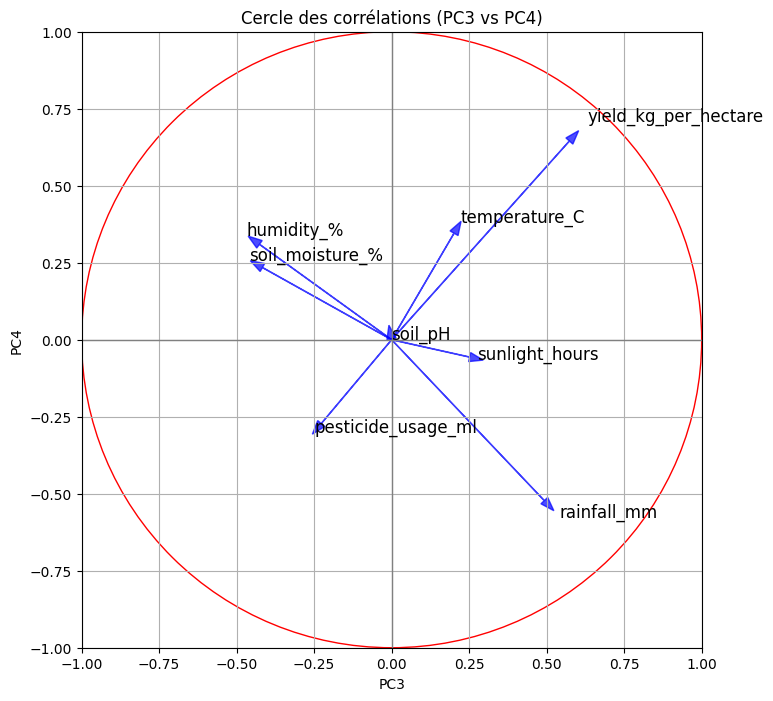

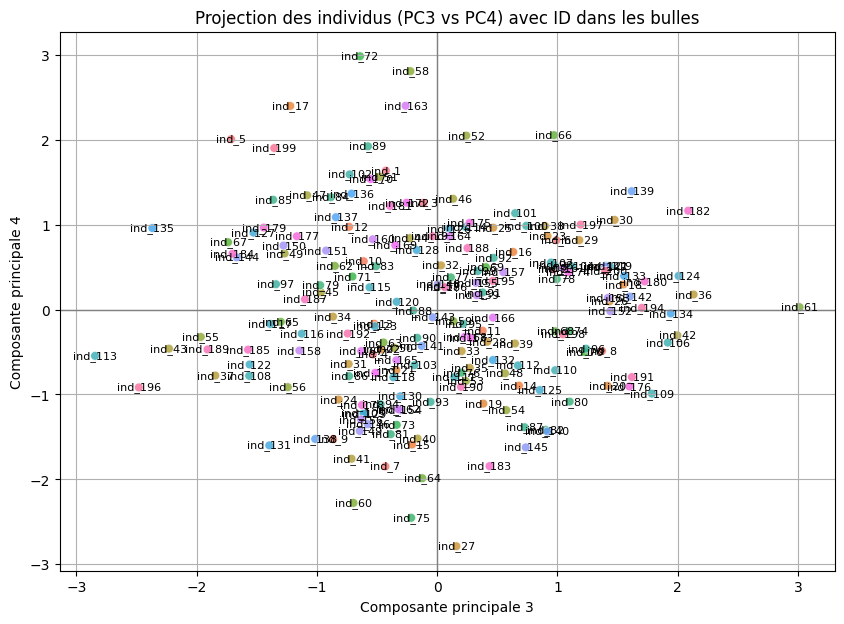

Valeurs propres (Eigenvalues) :
[1.34914893 1.17213296 1.08200789 1.03674717 0.99710246]

Variance expliquée par chaque composante :
[0.1678004  0.14578404 0.13457473 0.12894543 0.12401462]

Variance cumulée expliquée :
[0.1678004  0.31358444 0.44815917 0.5771046  0.70111922]

Composantes principales (PC) :
[[ 4.18869472e-01 -4.03277587e-01  3.69108860e-01  2.19721973e-01
   7.13972835e-02  4.36825989e-01  5.27572912e-01  5.61138397e-02]
 [ 4.80403491e-01  4.92872400e-01  4.46514192e-01  8.33266659e-02
  -3.72625681e-01  4.15562206e-02 -3.04426036e-01 -2.94480895e-01]
 [-4.00690139e-01 -5.28368332e-04  1.93500703e-01  4.73381244e-01
  -4.09912971e-01  2.41835159e-01 -2.18193599e-01  5.51174631e-01]
 [ 2.30252984e-01  2.88192799e-03  3.39549225e-01 -5.13038804e-01
   3.04247564e-01 -5.53570490e-02 -2.67228343e-01  6.33585667e-01]
 [ 9.58583923e-02  1.40048144e-01 -4.43987254e-01 -4.74137377e-01
  -4.01275891e-01  6.10562317e-01  7.74634640e-02  9.72495795e-02]]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


quant_vars = [
    'soil_moisture_%', 'soil_pH', 'temperature_C', 'rainfall_mm',
    'humidity_%', 'sunlight_hours', 'pesticide_usage_ml', 'yield_kg_per_hectare'
]
X = df[quant_vars] # Remplacer par tes vraies variables

X = df[quant_vars]
X_scaled = StandardScaler().fit_transform(X)

# Appliquer l'ACP
pca = PCA(n_components=5)
pca_coords = pca.fit_transform(X_scaled)
components = pca.components_
eigval = pca.explained_variance_

# === Cercle des corrélations ===
def plot_correlation_circle(components, quant_vars, pc1, pc2):
    # Calcul de la corrélation pour chaque variable
    corvar = components.T * np.sqrt(eigval)  # Prendre la racine carrée des valeurs propres
    corvar_df = pd.DataFrame(
        corvar,
        index=quant_vars,
        columns=[f'PC{i+1}' for i in range(components.shape[0])]
    )

    plt.figure(figsize=(8, 8))
    plt.axhline(0, color='grey', lw=1)
    plt.axvline(0, color='grey', lw=1)
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)

    for i in range(len(corvar_df)):
        plt.arrow(0, 0, corvar_df.iloc[i, pc1], corvar_df.iloc[i, pc2],
                  head_width=0.03, color='blue', alpha=0.7)
        plt.text(corvar_df.iloc[i, pc1]*1.1, corvar_df.iloc[i, pc2]*1.1,
                 corvar_df.index[i], fontsize=12)

    circle = plt.Circle((0, 0), 1, color='red', fill=False)
    plt.gca().add_artist(circle)
    plt.xlabel(f"PC{pc1+1}")
    plt.ylabel(f"PC{pc2+1}")
    plt.title(f"Cercle des corrélations (PC{pc1+1} vs PC{pc2+1})")
    plt.grid()
    plt.show()

# === Projection des individus ===
def plot_projection(pca_coords, df, pc1, pc2):
    pca_df = pd.DataFrame(pca_coords, columns=[f'PC{i+1}' for i in range(pca_coords.shape[1])])
    pca_df['individu'] = df['individu'].values  # Remplace 'individu' par le nom réel

    # Compter le nombre d'occurrences de chaque individu
    id_counts = pca_df['individu'].value_counts()
    pca_df['count'] = pca_df['individu'].map(id_counts)

    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=pca_df, x=f'PC{pc1+1}', y=f'PC{pc2+1}',
                    hue='individu', size='count', sizes=(40, 200), alpha=0.8, legend=None)

    for i in range(len(pca_df)):
        plt.text(pca_df[f'PC{pc1+1}'].iloc[i], pca_df[f'PC{pc2+1}'].iloc[i],
                 str(pca_df['individu'].iloc[i]), fontsize=8, ha='center', va='center')

    plt.title(f"Projection des individus (PC{pc1+1} vs PC{pc2+1}) avec ID dans les bulles")
    plt.axhline(0, color='grey', lw=1)
    plt.axvline(0, color='grey', lw=1)
    plt.xlabel(f"Composante principale {pc1+1}")
    plt.ylabel(f"Composante principale {pc2+1}")
    plt.grid()
    plt.show()

# === Affichage pour chaque paire de composantes principales (PC1 vs PC2, PC1 vs PC3, etc.) ===
for pc1 in range(4):  # PC1 à PC4
    for pc2 in range(pc1+1, 4):  # PC2 à PC4
        plot_correlation_circle(components, quant_vars, pc1, pc2)
        plot_projection(pca_coords, df, pc1, pc2)
# === Affichage des résultats de l'ACP ===
print("Valeurs propres (Eigenvalues) :")
print(eigval)  # Affiche les valeurs propres
print("\nVariance expliquée par chaque composante :")
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)  # Affiche la proportion de variance expliquée

# Afficher la variance cumulée expliquée
cumulative_variance = np.cumsum(explained_variance_ratio)
print("\nVariance cumulée expliquée :")
print(cumulative_variance)

# === Affichage des coordonnées des composants principaux ===
print("\nComposantes principales (PC) :")
print(components)  # Affiche les composantes principales



<ipython-input-14-4b00c16aac42>:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(coord_modalites[0][i], coord_modalites[1][i], modality, fontsize=9, color='red')


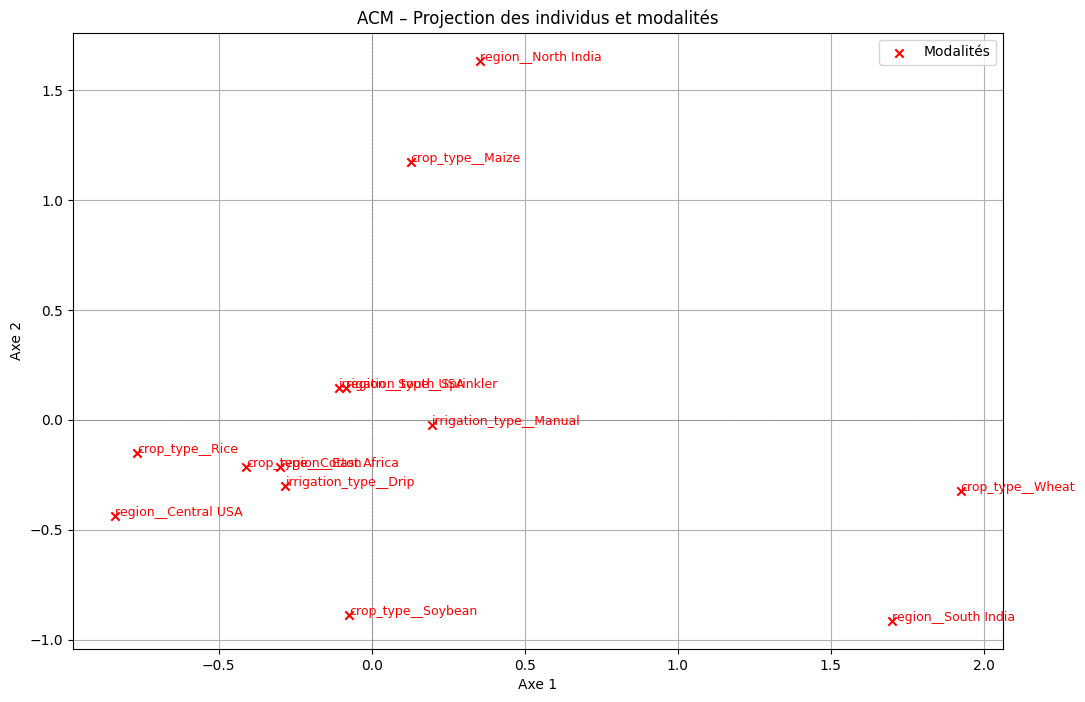

Contributions des modalités aux axes :
                                   0         1
region__Central USA         0.132596  0.038218
region__East Africa         0.017355  0.009248
region__North India         0.016740  0.379012
region__South India         0.333525  0.101688
region__South USA           0.000951  0.003006
crop_type__Cotton           0.026580  0.007622
crop_type__Maize            0.003279  0.296139
crop_type__Rice             0.090693  0.003752
crop_type__Soybean          0.000881  0.131574
crop_type__Wheat            0.356384  0.010679
irrigation_type__Drip       0.012262  0.014627
irrigation_type__Manual     0.006395  0.000091
irrigation_type__Sprinkler  0.002361  0.004346
 Qualité de représentation (cos²) des modalités :
                                   0         1
region__Central USA         0.702529  0.192293
region__East Africa         0.090110  0.045600
region__North India         0.124170  2.669764
region__South India         2.886262  0.835669
region__South USA 

In [ ]:
!pip install prince openpyxl

import pandas as pd
import prince
import matplotlib.pyplot as plt



# 4. Préparation des données
qual_vars = ['region', 'crop_type', 'irrigation_type']
df_qual = df[qual_vars]
noms = df['individu']

# 5. Création et ajustement du modèle ACM
acm = prince.MCA(
    n_components=2,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',    # Spécification explicite du moteur
    random_state=42
)
acm = acm.fit(df_qual)

# 6. Extraction des coordonnées des individus et des modalités
coord_individus = acm.row_coordinates(df_qual)
coord_individus['Nom'] = noms

coord_modalites = acm.column_coordinates(df_qual)

# 7. Contributions des modalités aux axes
contribs_modalites = acm.column_contributions_

# Calculer la qualité de représentation (cos²) des modalités
cos2_modalites = coord_modalites ** 2

# 8. Affichage graphique
plt.figure(figsize=(12, 8))



# Affichage des modalités
plt.scatter(coord_modalites[0], coord_modalites[1], c='red', marker='x', label='Modalités')
for i, modality in enumerate(coord_modalites.index):
    plt.text(coord_modalites[0][i], coord_modalites[1][i], modality, fontsize=9, color='red')

plt.axhline(0, linestyle='--', color='grey', linewidth=0.5)
plt.axvline(0, linestyle='--', color='grey', linewidth=0.5)
plt.title("ACM – Projection des individus et modalités")
plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.legend()
plt.grid(True)
plt.show()

# 9. Affichage des résultats
print("Contributions des modalités aux axes :")
print(contribs_modalites)

print(" Qualité de représentation (cos²) des modalités :")
print(cos2_modalites)

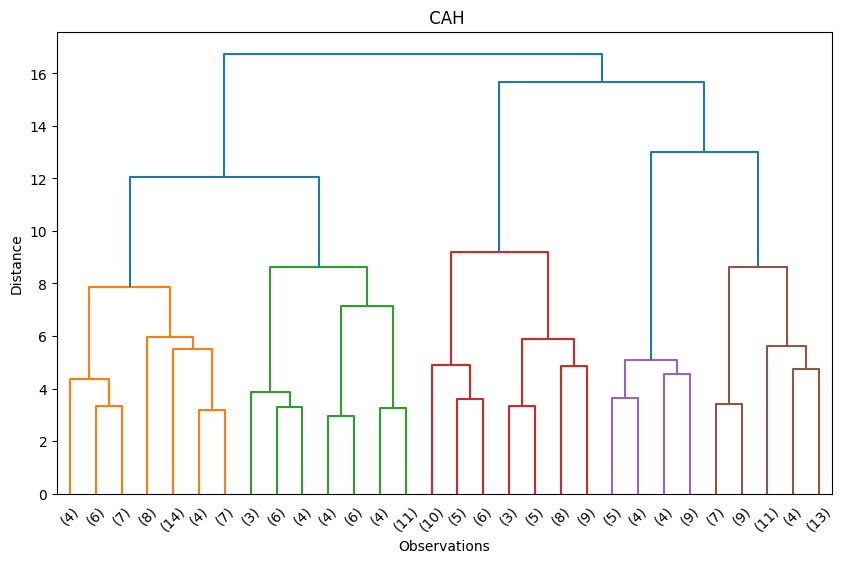

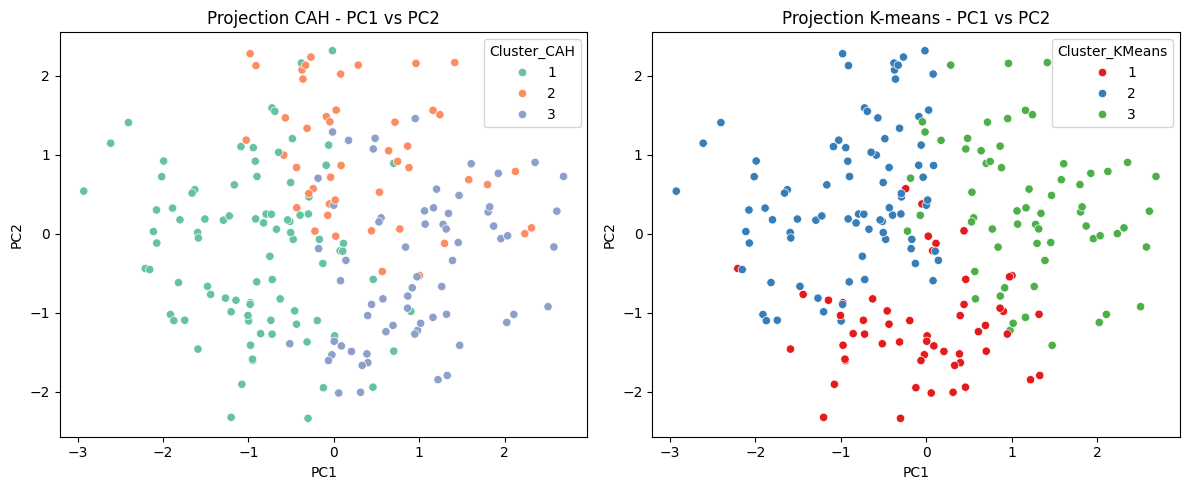

Indice de Rand ajusté entre CAH et K-means : 0.256
Moyennes des variables par cluster (CAH) :
 Cluster_CAH                     1            2            3
soil_moisture_%         21.081136    31.857826    28.636061
soil_pH                  6.662614     6.680000     6.121212
temperature_C           22.870341    26.118696    26.854394
rainfall_mm            160.276705   215.970652   182.629697
humidity_%              65.318750    60.088043    69.859697
sunlight_hours           6.239318     7.395435     7.810000
pesticide_usage_ml      22.076705    28.655000    33.432273
yield_kg_per_hectare  4137.921364  2777.106739  4727.077424


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import adjusted_rand_score

# --- 1. Chargement ou préparation des données (remplace X par ton DataFrame) ---
# Exemple : X = df.select_dtypes(include=[np.number])  # variables numériques

# --- 2. Normalisation ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3. ACP ---
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3", "PC4"])

# --- 4. CAH ---
Z = linkage(X_pca, method='ward')

# Dendrogramme
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='lastp', p=30)
plt.title(' CAH')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()

# Choix du nombre de clusters (modifier k si nécessaire)
k = 3
labels_cah = fcluster(Z, k, criterion='maxclust')
df_pca['Cluster_CAH'] = labels_cah

# --- 5. K-means ---
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca)
df_pca['Cluster_KMeans'] = labels_kmeans + 1

# --- 6. Visualisation ---
plt.figure(figsize=(12, 5))

# CAH
plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_CAH', data=df_pca, palette='Set2')
plt.title('Projection CAH - PC1 vs PC2')

# K-means
plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_KMeans', data=df_pca, palette='Set1')
plt.title('Projection K-means - PC1 vs PC2')

plt.tight_layout()
plt.show()

# --- 7. Comparaison ---
ari = adjusted_rand_score(df_pca['Cluster_CAH'], df_pca['Cluster_KMeans'])
print(f"Indice de Rand ajusté entre CAH et K-means : {ari:.3f}")

# --- 8. Caractérisation des clusters ---
df_clusters = pd.concat([pd.DataFrame(X).reset_index(drop=True), df_pca[['Cluster_CAH']]], axis=1)
caract = df_clusters.groupby('Cluster_CAH').mean()
print("Moyennes des variables par cluster (CAH) :\n", caract.T)
